# Assignment 1: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

This is good background reading on [Earth's energy budget](https://earthobservatory.nasa.gov/features/EnergyBalance#:~:text=Areas%20around%20the%20equator%20absorbed,and%20blue%20than%20they%20absorbed.)

For an xarray review, see this [tutorial](https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html)
and the [xarray documentation.](https://xarray.pydata.org/en/stable/index.html)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6) - this can be done by setting matplotlib plt.rcParams().

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

plt.rcParams['figure.figsize'] = 12, 6

Next, download the NetCDF file using wget (remember Colab requires a '!' before a linux shell command such as wget).

In [ ]:
!pip install wget 
import wget
url = 'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
wget.download(url)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=be3a48f9a69c0b524cddd87797ea1079625121a5c602eab05a54f7d058f4e54d
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

## 1.1) Open the dataset and display its contents 


In [ ]:
ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. Hint: xarray.Dataset.variables can be used to iterate over variables in an xarray dataset and xarray.DataArray.attrs to return the 'long_name' attribute. Another hint: executing xarray.variable in a cell will print the details for that variable, including the attributes. 

In [ ]:
for i in ds.variables:
  print (ds[i].attrs['long_name'])

longitude
Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
Incoming Solar Flux, Monthly Means
Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditions
Cloud Visible Optical Depth, Monthly Means, Daytime conditions
time
latitude


## 2.1) Calculate the time-mean of the entire dataset

In [ ]:
time_mean = ds.mean(dim='time')

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

Hint: for plotting, an easy starting point is xr.DataArray.plot(), where DataArray can be accessed for each variable in a dataset by xr.Dataset.variable. The general xr.DataArray.plot() is just a wrapper for matplotlib that uses the coordinates for the variables to set "reasonable" plotting parameters and labels. 

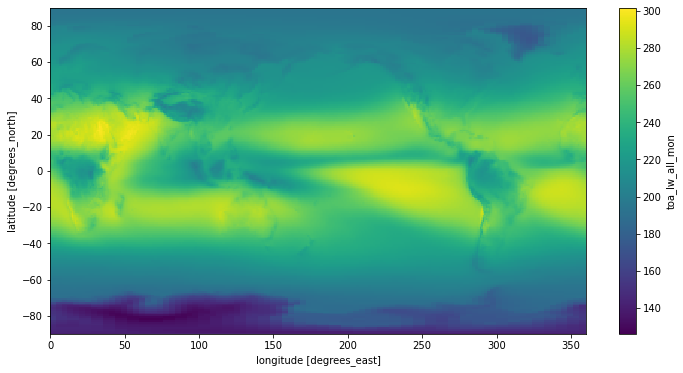

In [ ]:
time_mean.toa_lw_all_mon.plot()

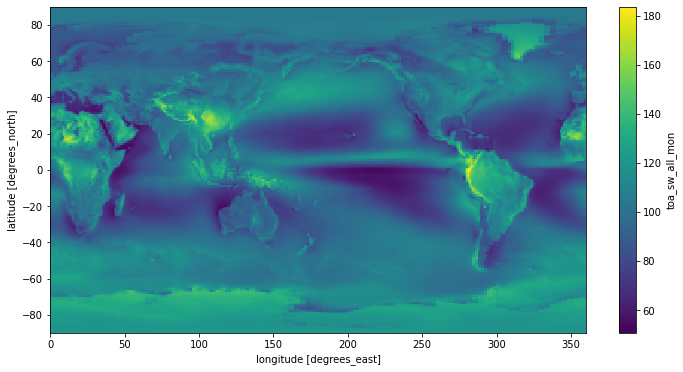

In [ ]:
time_mean.toa_sw_all_mon.plot()

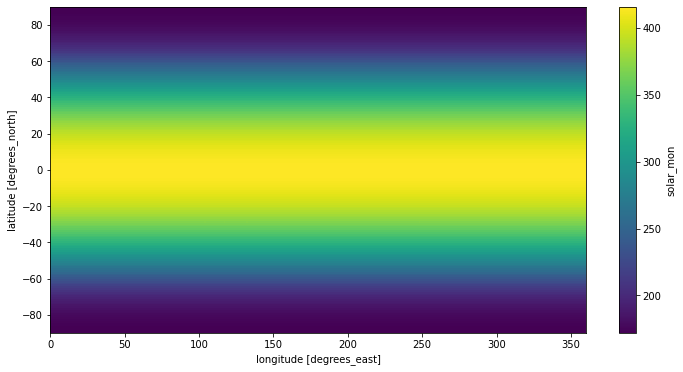

In [ ]:
time_mean.solar_mon.plot()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

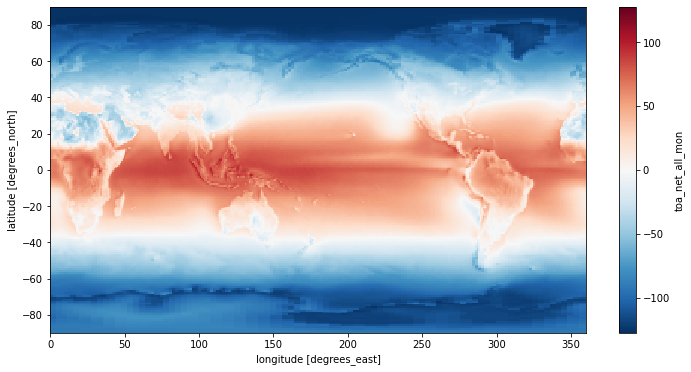

In [ ]:
time_mean.toa_net_all_mon.plot()

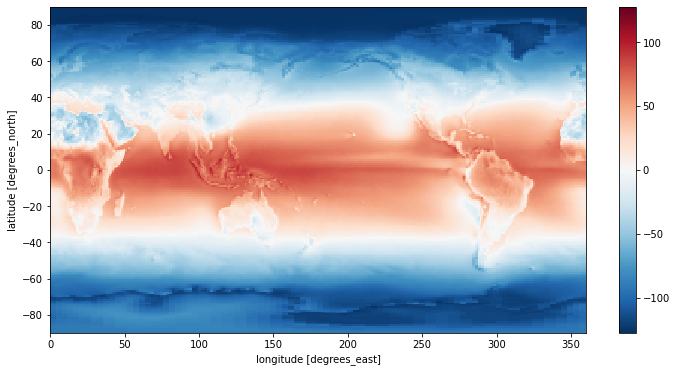

In [ ]:
net_flux = time_mean.solar_mon - time_mean.toa_lw_all_mon - time_mean.toa_sw_all_mon
net_flux.plot()

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [ ]:
net_flux.mean()

<xarray.DataArray ()>
array(-28.728985, dtype=float32)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude in radians.)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [ ]:
lat_rad = ds.lat * np.pi / 180
lat_rad
cos_values = np.cos(lat_rad)
cos_values
weight = cos_values / cos_values.mean()
weight

<xarray.DataArray 'lat' (lat: 180)>
array([0.01370748, 0.0411182 , 0.06851622, 0.09589355, 0.12324168,
       0.15055206, 0.1778168 , 0.20502736, 0.23217563, 0.25925282,
       0.28625125, 0.31316227, 0.33997828, 0.36669037, 0.39329097,
       0.41977173, 0.44612443, 0.4723416 , 0.49841455, 0.52433586,
       0.55009747, 0.57569146, 0.60111016, 0.6263455 , 0.65139043,
       0.6762366 , 0.70087695, 0.72530377, 0.74950975, 0.7734873 ,
       0.7972291 , 0.8207283 , 0.8439775 , 0.8669696 , 0.8896975 ,
       0.9121545 , 0.93433356, 0.95622796, 0.97783124, 0.99913657,
       1.0201377 , 1.0408279 , 1.0612011 , 1.081251  , 1.1009717 ,
       1.120357  , 1.1394008 , 1.1580979 , 1.176442  , 1.1944277 ,
       1.2120496 , 1.2293024 , 1.2461807 , 1.2626793 , 1.2787935 ,
       1.294518  , 1.3098481 , 1.3247793 , 1.3393071 , 1.3534267 ,
       1.3671341 , 1.3804251 , 1.3932956 , 1.4057418 , 1.4177597 ,
       1.4293457 , 1.4404963 , 1.4512081 , 1.461478  , 1.4713026 ,
       1.480679  , 1.4896045 , 1.4980761 , 1.5060915 , 1.5136479 ,
       1.5207435 , 1.5273757 , 1.5335428 , 1.5392425 , 1.5444736 ,
       1.5492342 , 1.5535228 , 1.5573382 , 1.5606792 , 1.5635449 ,
       1.5659342 , 1.5678465 , 1.5692813 , 1.5702381 , 1.5707166 ,
       1.5707166 , 1.5702381 , 1.5692813 , 1.5678465 , 1.5659342 ,
       1.5635449 , 1.5606792 , 1.5573382 , 1.5535228 , 1.5492342 ,
       1.5444736 , 1.5392425 , 1.5335428 , 1.5273757 , 1.5207435 ,
       1.5136479 , 1.5060915 , 1.4980761 , 1.4896045 , 1.480679  ,
       1.4713026 , 1.461478  , 1.4512081 , 1.4404963 , 1.4293457 ,
       1.4177597 , 1.4057418 , 1.3932956 , 1.3804251 , 1.3671341 ,
       1.3534267 , 1.3393071 , 1.3247793 , 1.3098481 , 1.294518  ,
       1.2787935 , 1.2626793 , 1.2461807 , 1.2293024 , 1.2120496 ,
       1.1944277 , 1.176442  , 1.1580979 , 1.1394008 , 1.120357  ,
       1.1009717 , 1.081251  , 1.0612011 , 1.0408279 , 1.0201377 ,
       0.99913657, 0.97783124, 0.95622796, 0.93433356, 0.9121545 ,
       0.8896975 , 0.8669696 , 0.8439775 , 0.8207283 , 0.7972291 ,
       0.7734873 , 0.74950975, 0.72530377, 0.70087695, 0.6762366 ,
       0.65139043, 0.6263455 , 0.60111016, 0.57569146, 0.55009747,
       0.52433586, 0.49841455, 0.4723416 , 0.44612443, 0.41977173,
       0.39329097, 0.36669037, 0.33997828, 0.31316227, 0.28625125,
       0.25925282, 0.23217563, 0.20502736, 0.1778168 , 0.15055206,
       0.12324168, 0.09589355, 0.06851622, 0.0411182 , 0.01370748],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [ ]:
toa_net_weight = time_mean.toa_net_all_mon * weight
toa_net_weight.mean()


<xarray.DataArray ()>
array(0.87809175, dtype=float32)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

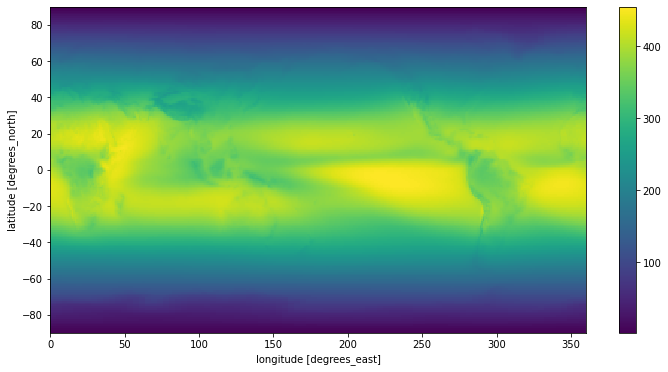

In [ ]:
toa_lw_weight = time_mean.toa_lw_all_mon * weight
toa_lw_weight.plot()

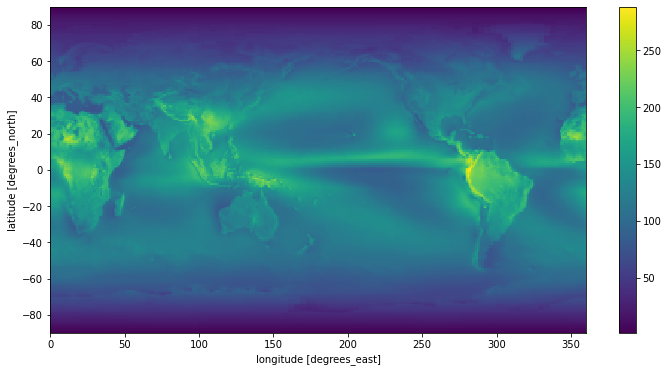

In [ ]:
toa_sw_weight = time_mean.toa_sw_all_mon * weight
toa_sw_weight.plot()

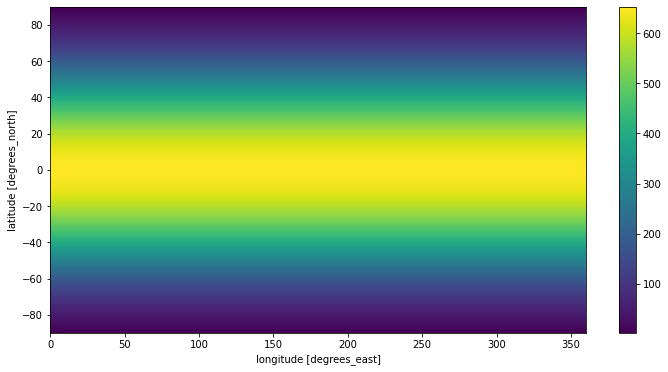

In [ ]:
toa_solar_weight = time_mean.solar_mon * weight
toa_solar_weight.plot()

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [ ]:
r2 = np.ones_like(6371^2)
lon_sp = np.ones_like(ds.lon)
lat_sp = np.ones_like(ds.lat)
cos_values_new = np.ones_like(cos_values)
pixel_area = r2 * cos_values_new * lon_sp * lat_sp

ValueError: ignored

Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

## 4.3) Plot the cumulative sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

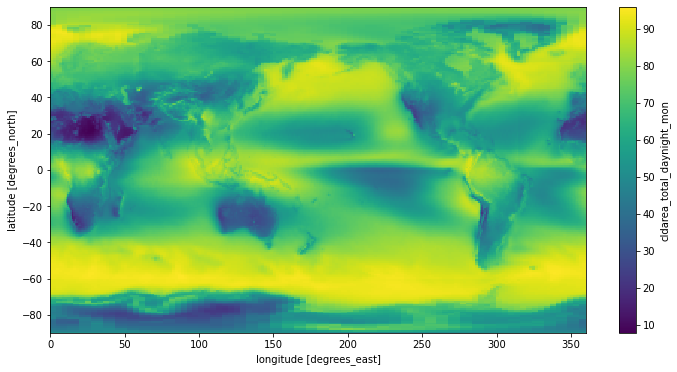

In [ ]:
time_mean.cldarea_total_daynight_mon.plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [ ]:
ds.cldarea_total_daynight_mon <= 25

<xarray.DataArray 'cldarea_total_daynight_mon' (time: 203, lat: 180, lon: 360)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [ ]:
ds.cldarea_total_daynight_mon >= 75

<xarray.DataArray 'cldarea_total_daynight_mon' (time: 203, lat: 180, lon: 360)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

In [ ]:
plt.subplot(ds.toa_lw_all_mon)
plt.subplot(DataArray: ds.cldarea_total_daynight_mon)

SyntaxError: ignored

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?